In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam,SGD,Adagrad

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv('wine.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [3]:
data.duplicated().sum()

1177

In [4]:
data=data.drop_duplicates()

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [7]:
data['type']=data['type'].map({'red':0,'white':1}) #in DL target need to be numerical

C:\Users\HP\AppData\Local\Temp/ipykernel_10908/1153390966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type']=data['type'].map({'red':0,'white':1}) #in DL target need to be numerical


In [8]:
x= data.drop('type',axis=1)
y=data['type']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [10]:
x_train.shape

(4256, 12)

In [11]:
scaler = MinMaxScaler()
x_train =scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
model =Sequential()
model.add(Dense(100,input_dim =12,activation ='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

callbacks =tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                     patience=10)
model.compile(loss='binary_crossentropy',
             optimizer=SGD(learning_rate=0.05),metrics=['accuracy'])
model.summary()

C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 300)                 │          60,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,001 (457.04 KB)

 Trainable params: 117,001 (457.04 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
training_info = model.fit(x_train,y_train,batch_size=400,epochs=100,
                         validation_data=(x_test,y_test),
                         callbacks=callbacks)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7430 - loss: 0.4933 - val_accuracy: 0.7481 - val_loss: 0.4498
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7468 - loss: 0.4700 - val_accuracy: 0.7481 - val_loss: 0.4162
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7420 - loss: 0.4437 - val_accuracy: 0.7481 - val_loss: 0.3796
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7440 - loss: 0.4084 - val_accuracy: 0.7481 - val_loss: 0.3432
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7450 - loss: 0.3749 - val_accuracy: 0.7481 - val_loss: 0.3059
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7626 - loss: 0.3381 - val_accuracy: 0.8947 - val_loss: 0.2717
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8248 - loss: 0.3052 - val_accuracy: 0.9305 - val_loss: 0.2412
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8911 - loss: 0.2754 - val_accuracy: 0.

In [22]:
hist=training_info.history
# hist

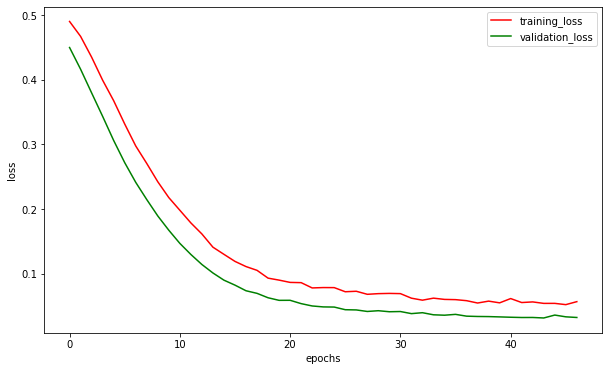

In [23]:
plt.figure(figsize=(10, 6)) 
plt.plot(hist['loss'],label='training_loss',color='red')
plt.plot(hist['val_loss'],label='validation_loss',color='green')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

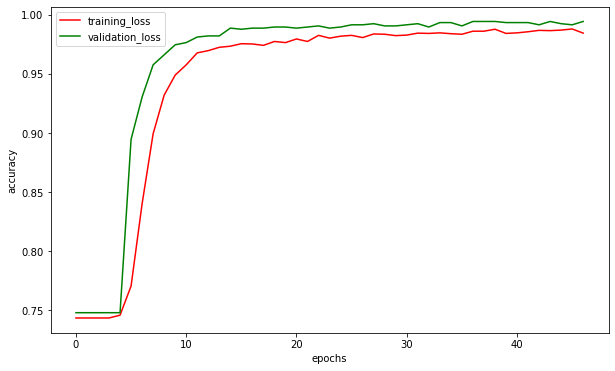

In [24]:
plt.figure(figsize=(10, 6)) 
plt.plot(hist['accuracy'],label='training_loss',color='red')
plt.plot(hist['val_accuracy'],label='validation_loss',color='green')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [25]:
y_pred=model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [26]:
y_pred

array([[0.99860436],
       [0.99696505],
       [0.00896771],
       ...,
       [0.99851096],
       [0.9975504 ],
       [0.9992503 ]], dtype=float32)

In [27]:
y_pred =((y_pred[:,0])>0.5).astype('int')

In [28]:
y_pred

array([1, 1, 0, ..., 1, 1, 1])